## **Gym Shark Products**

Data contains trending products, average price, keywords (Google Ads purposes), and
variants (colors, sizes).
I am interested in the brand and product strategy. The sales and engagement is missing
from the dataset but the information provided is enough to understand the structure and
design direction within Gym Shark's products.


In [15]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## **2. Clean, Organize, and Explore**

**Problem 2.1. Cleaning and organizing the data**

In [16]:
# Load the dataset
df = pd.read_csv("gymshark_products.csv")

# Drop unnecessary columns
df = df.drop(columns=["vendor", "inventory_quantity", "image_url"], errors="ignore")

# Rename columns for clarity
df = df.rename(columns={
    "title": "product_name",
    "product_type": "category",
    "variant_title": "size_variant",
    "sku": "product_sku",
    "price": "price_usd"
})

# Handle missing values
df["category"] = df["category"].fillna("Unknown")
# Convert tags to a list of strings, handling potential NaN values before splitting
df["tags"] = df["tags"].fillna("").apply(lambda x: [tag.strip() for tag in x.split(',') if tag.strip()])


# Clean price column (remove "$" if any, make numeric)
try:
    # Use a raw string for the regex pattern to avoid the SyntaxWarning
    df["price_usd"] = df["price_usd"].replace(r'[\$,]', '', regex=True).astype(float)
except ValueError as e:
    print(f"Error converting price_usd to float: {e}")
    # If there are still errors after removing '$', coerce them to NaN
    df["price_usd"] = pd.to_numeric(df["price_usd"].replace(r'[\$,]', '', regex=True), errors='coerce')


# Strip extra spaces and make sure text columns are clean
text_cols = ["product_name", "category", "handle", "size_variant", "product_sku"] # Excluded 'tags' as it's now a list
for col in text_cols:
    df[col] = df[col].astype(str).str.strip()


# Remove duplicates based on product name and size variant
df = df.drop_duplicates(subset=["product_name", "size_variant"], keep="first")

# Verify cleaning
print(df.info())
print(df.head())

# Save cleaned version
df.to_csv("gymshark_products_cleaned.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 17085 entries, 0 to 17276
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  17085 non-null  object 
 1   category      17085 non-null  object 
 2   tags          17085 non-null  object 
 3   handle        17085 non-null  object 
 4   size_variant  17085 non-null  object 
 5   product_sku   17085 non-null  object 
 6   price_usd     17084 non-null  float64
 7   image_src     17077 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.2+ MB
None
                                product_name          category  \
0  Gymshark Vital Crop Top - Base Green Marl  Womens Crop Tops   
1  Gymshark Vital Crop Top - Base Green Marl  Womens Crop Tops   
2  Gymshark Vital Crop Top - Base Green Marl  Womens Crop Tops   
3  Gymshark Vital Crop Top - Base Green Marl  Womens Crop Tops   
4  Gymshark Vital Crop Top - Base Green Marl  Womens Crop Tops   

             

**Problem 2.2. Exploring the data**

In [17]:
# Descriptive statistics for quantitative continuous data
print("Descriptive Statistics for Price (USD):")
print(df["price_usd"].describe())

# Calculate mode for price_usd (can have multiple modes)
try:
    mode_price = df["price_usd"].mode()
    print(f"\nMode of Price (USD):\n{mode_price}")
except Exception as e:
    print(f"\nCould not calculate mode for Price (USD): {e}")


# Frequency counts for qualitative data (Category)
print("\nFrequency Counts for Product Category:")
print(df["category"].value_counts())

# Frequency counts for qualitative data (Size Variant)
print("\nFrequency Counts for Size Variant:")
print(df["size_variant"].value_counts())

# For the 'tags' column, since it's a list of strings,
# we can explore the frequency of individual tags.
# First, flatten the list of lists into a single list
all_tags = [tag for sublist in df["tags"] for tag in sublist]

# Then, get the frequency distribution of individual tags
from collections import Counter
tag_counts = Counter(all_tags)

print("\nTop 20 Most Frequent Tags:")
for tag, count in tag_counts.most_common(20):
    print(f"{tag}: {count}")

# You can also explore other discrete or qualitative columns as needed
# For example, if 'handle' or 'product_sku' were relevant for frequency counts:
# print("\nFrequency Counts for Handle:")
# print(df["handle"].value_counts().head()) # Displaying head as there might be many unique handles

# print("\nFrequency Counts for Product SKU:")
# print(df["product_sku"].value_counts().head()) # Displaying head as there might be many unique SKUs

Descriptive Statistics for Price (USD):
count    17084.000000
mean        29.636230
std         13.943767
min          3.600000
25%         21.000000
50%         28.000000
75%         36.000000
max        150.000000
Name: price_usd, dtype: float64

Mode of Price (USD):
0    28.0
Name: price_usd, dtype: float64

Frequency Counts for Product Category:
category
Mens Ss Tops          1399
Mens Shorts           1387
Womens Sports Bras    1341
Womens Shorts         1245
Womens Leggings       1182
                      ... 
Womens Jackets           6
Womens Socks             6
womens Headwear          4
Misc.                    3
Bag                      1
Name: count, Length: 70, dtype: int64

Frequency Counts for Size Variant:
size_variant
Small                      2469
Medium                     2469
Large                      2468
Extra Small                2405
Extra Large                2364
Extra Extra Large          2358
Extra Extra Small          1221
Extra Extra Extra Large    1050

In [18]:
# Remove the row where size_variant is showing 10.00
print("Rows with 'Unknown' category:")
display(df[df['category'] == 'Unknown'])

print("\nRows with '10.00' size variant:")
display(df[df['size_variant'] == '10.00'])

Rows with 'Unknown' category:


,product_name,category,tags,handle,size_variant,product_sku,price_usd,image_src



Rows with '10.00' size variant:


,product_name,category,tags,handle,size_variant,product_sku,price_usd,image_src


**Problem 2.3. Visualizing the data**

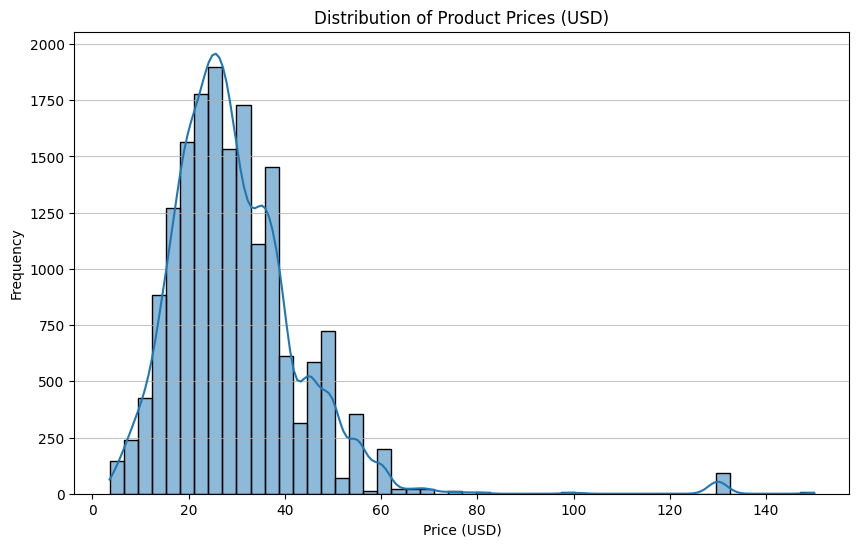

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Distribution of Price (USD)
plt.figure(figsize=(10, 6))
sns.histplot(df['price_usd'], bins=50, kde=True)
plt.title('Distribution of Product Prices (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

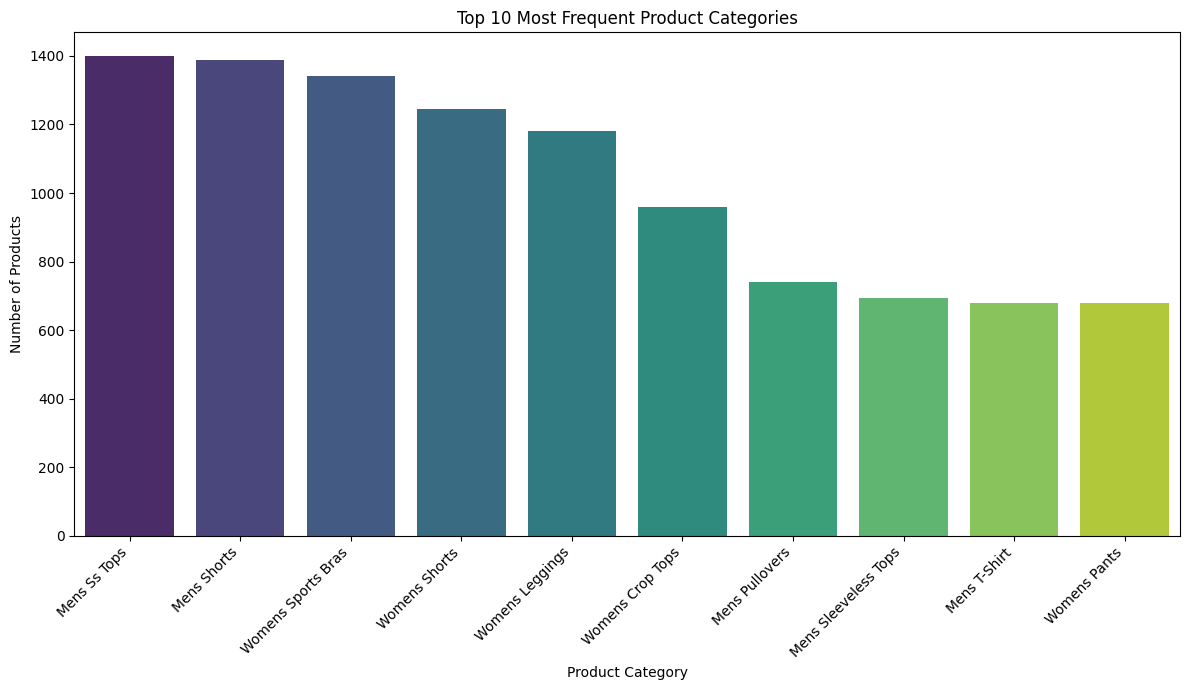

In [20]:
# Visualization 2: Frequency of Top 10 Product Categories
plt.figure(figsize=(12, 7))
top_categories = df['category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis', hue=top_categories.index, legend=False)
plt.title('Top 10 Most Frequent Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

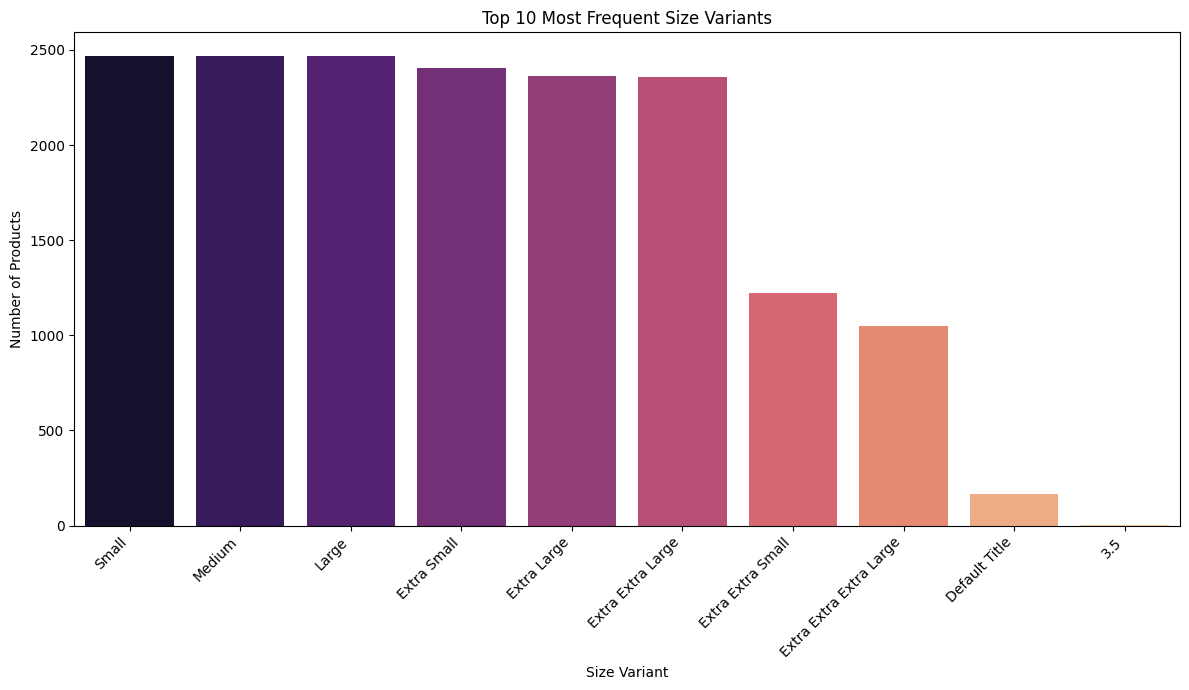

In [21]:
# Visualization 3: Frequency of Top 10 Size Variants
plt.figure(figsize=(12, 7))
top_sizes = df['size_variant'].value_counts().nlargest(10)
sns.barplot(x=top_sizes.index, y=top_sizes.values, palette='magma', hue=top_sizes.index, legend=False)
plt.title('Top 10 Most Frequent Size Variants')
plt.xlabel('Size Variant')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 30 Most Frequent Tags:


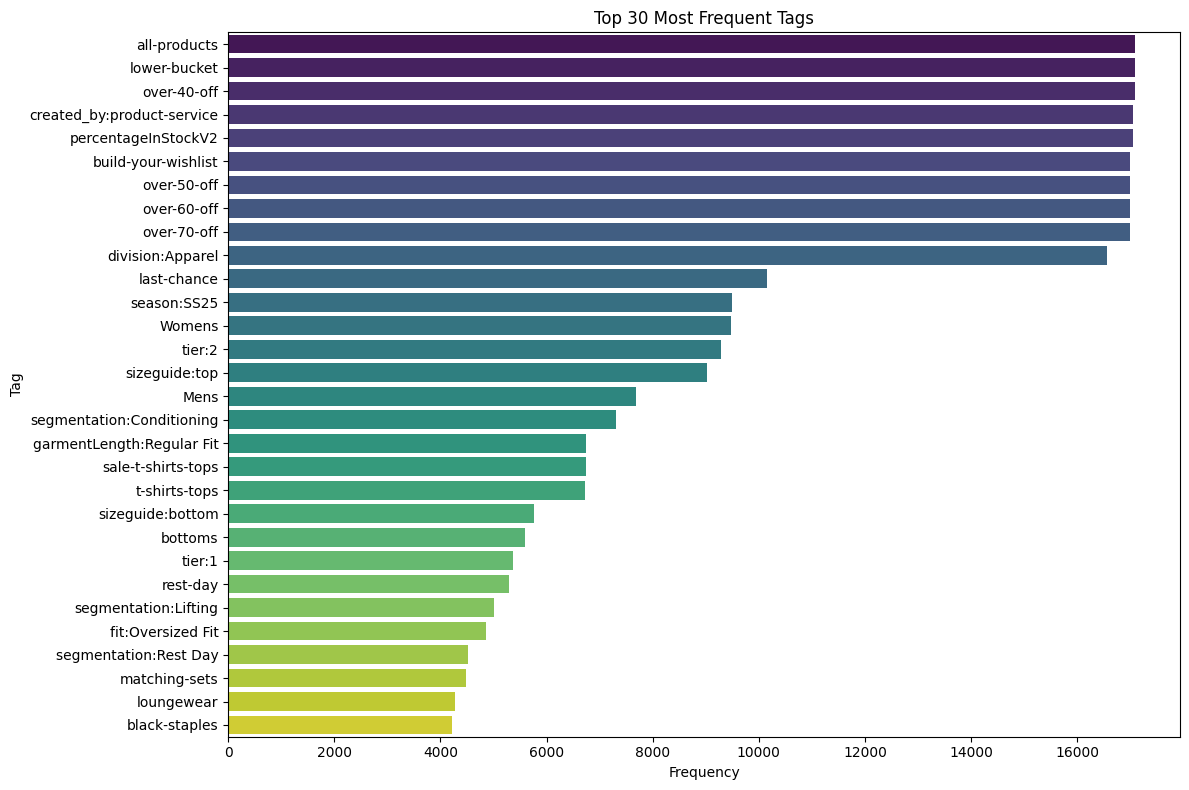

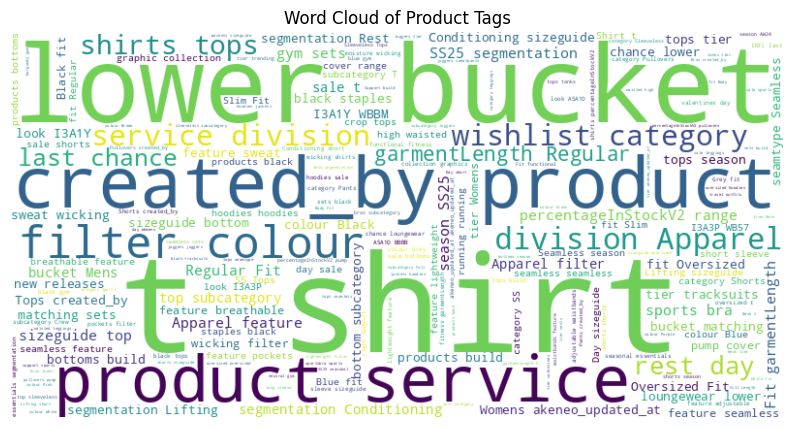

In [22]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

# Perform word frequency analysis on the 'tags' column
# Flatten the list of lists into a single list of all tags
all_tags = [tag for sublist in df["tags"] for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Remove empty strings or 'No Tags' if they exist and are not relevant
if '' in tag_counts:
    del tag_counts['']
if 'No Tags' in tag_counts:
    del tag_counts['No Tags']


# Visualize the top 30 most frequent tags using a bar chart
print("Top 30 Most Frequent Tags:")
top_tags = tag_counts.most_common(30)
tags, counts = zip(*top_tags)

plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(tags), palette='viridis', hue=list(tags), legend=False)
plt.title('Top 30 Most Frequent Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()


# Optional: Generate a Word Cloud for tags (requires wordcloud library)
# If you haven't installed it, you can run: pip install wordcloud
try:
    # Create a single string of all tags for the word cloud
    tags_text = " ".join(all_tags)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Product Tags')
    plt.show()

except ImportError:
    print("\nWordCloud library not found. Install it using: pip install wordcloud")
except Exception as e:
    print(f"\nAn error occurred while generating the word cloud: {e}")

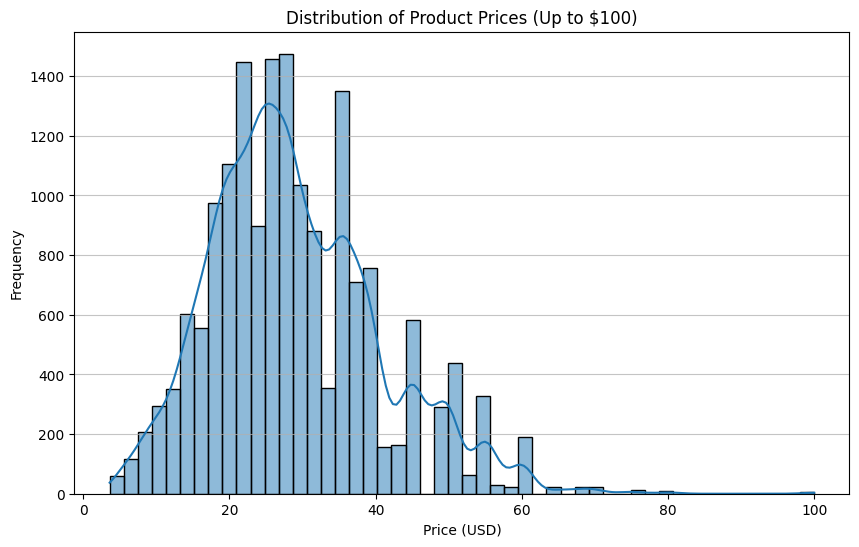

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on prices in a more common range for better visibility
price_limit = 100 # Adjust this limit as needed

df_limited_price = df[df['price_usd'] <= price_limit]

# Visualization: Histogram of Prices (Limited Range)
plt.figure(figsize=(10, 6))
sns.histplot(df_limited_price['price_usd'], bins=50, kde=True)
plt.title(f'Distribution of Product Prices (Up to ${price_limit})')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()



**Problem 2.4.Describe the distribution of the data**

The Distrubution of Product Prices histogram/chart shows that there are many products in the lower price ranges. It seems like the sweet spot is between $20 - 30.

The bar charts shows what are the top most frequent product categories and size variants.

This is good to know from a market analysis perspective because it shows a clear study of what products to focus on and how to select prices that are enough to compete with a company like Gym Shark.


## **3. Inference**

**Problem 3.1.**

## Design at least two different inference tests to draw conclusions from the data.



Identify two potential questions you want to answer using inference tests and formulate the corresponding null hypotheses.


In [24]:
# Based on the data exploration, potential questions for inference tests are:
# 1. Is there a significant difference in the average price between Men's and Women's t-shirts?
# 2. Is the proportion of products tagged with 'sale' the same for leggings compared to shorts?

# Null Hypothesis 1 (H01): There is no significant difference in the mean price between Men's T-shirts and Women's T-shirts.
# Null Hypothesis 2 (H02): The proportion of products tagged with 'sale' is the same for leggings and shorts.

print("Null Hypothesis 1 (H01): There is no significant difference in the mean price between Men's T-shirts and Women's T-shirts.")
print("Null Hypothesis 2 (H02): The proportion of products tagged with 'sale' is the same for leggings and shorts.")

Null Hypothesis 1 (H01): There is no significant difference in the mean price between Men's T-shirts and Women's T-shirts.
Null Hypothesis 2 (H02): The proportion of products tagged with 'sale' is the same for leggings and shorts.


### For each test, describe what “Type I” and “Type II” errors would mean


**Null Hypothesis 1 (H01): There is no significant difference in the mean price between Men's T-shirts and Women's T-shirts.**

*   **Type I Error (False Positive)**: This occurs when we **reject the null hypothesis** (H01) when it is actually **true**.
    *   **Meaning**: We conclude that there *is* a significant difference in the mean price between Men's and Women's T-shirts, when in reality, there is no true difference in the average prices of these two groups in the overall Gymshark product line.
    

*   **Type II Error (False Negative)**: This occurs when we **fail to reject the null hypothesis** (H01) when it is actually **false**.
    *   **Meaning**: We conclude that there is *no* significant difference in the mean price between Men's and Women's T-shirts, when in reality, there *is* a true difference in the average prices of these two groups in the overall Gymshark product line.
    

**Null Hypothesis 2 (H02): The proportion of products tagged with 'sale' is the same for leggings and shorts.**

*   **Type I Error (False Positive)**: This occurs when we **reject the null hypothesis** (H02) when it is actually **true**.
    *   **Meaning**: We conclude that the proportion of products tagged with 'sale' is *different* for leggings and shorts, when in reality, the proportion of sale-tagged items is the same for both product types in the overall Gymshark product line.
    

*   **Type II Error (False Negative)**: This occurs when we **fail to reject the null hypothesis** (H02) when it is actually **false**.
    *   **Meaning**: We conclude that the proportion of products tagged with 'sale' is *the same* for leggings and shorts, when in reality, the proportion of sale-tagged items *is* different for the two product types in the overall Gymshark product line.
    


###Given the nature of the data, indicate what type of test would be useful: (i.e., proportion test of two groups; means test of two groups; means test of multiple groups)


Based on the hypotheses we formulated and the nature of the data, here are the appropriate statistical tests:

**Null Hypothesis 1 (H01): There is no significant difference in the mean price between Men's T-shirts and Women's T-shirts.**

*   **Data Type**: We are comparing the **mean price** (a quantitative continuous variable) between two independent groups (Men's T-shirts and Women's T-shirts).
*   **Appropriate Test**: A **two-sample independent t-test** is the appropriate test for comparing the means of two independent groups.

**Null Hypothesis 2 (H02): The proportion of products tagged with 'sale' is the same for leggings and shorts.**

*   **Data Type**: We are comparing the **proportion** (a quantitative discrete variable, as we are counting occurrences of a tag) of products with a specific characteristic ('sale' tag) between two independent groups (Leggings and Shorts).
*   **Appropriate Test**: A **two-proportion z-test** is the appropriate test for comparing the proportions of two independent groups.

### Set Study Power and Significance Level

*   **Statistical Significance Level (Alpha - α)**: We will set the alpha level at **0.05**. This means that we are willing to accept a 5% chance of incorrectly rejecting the null hypothesis (committing a Type I error) when it is actually true. This is a commonly used threshold in statistical testing.

*   **Study Power (1 - Beta - β)**: We will set the study power at **0.80**. This means that we want an 80% chance of correctly rejecting the null hypothesis when it is false (detecting a real effect). This is a standard level of power, indicating that we have a reasonable chance of finding a significant result if one truly exists. The corresponding Beta (β) is 0.20, representing a 20% chance of committing a Type II error (failing to reject a false null hypothesis).

###Determine what the minimum detectable effect (MDE) will be for each test.


In [25]:
import statsmodels.stats.power as smp
import numpy as np

# MDE for H01: Difference in mean price between Men's and Women's T-shirts (Two-sample t-test)

# Sample sizes for Men's and Women's T-shirts
mens_tshirts = df[df['category'] == 'Mens T-Shirt']['price_usd']
womens_tshirts = df[df['category'] == 'Womens T-Shirt']['price_usd']

n1 = len(mens_tshirts)
n2 = len(womens_tshirts)

print(f"Sample size for Men's T-shirts: {n1}")
print(f"Sample size for Women's T-shirts: {n2}")

# The standard deviation of the combined group for a calculate pooled std dev.
# Pooled standard deviation
s_pooled = np.sqrt(((n1 - 1) * np.std(mens_tshirts, ddof=1)**2 + (n2 - 1) * np.std(womens_tshirts, ddof=1)**2) / (n1 + n2 - 2))
print(f"Pooled standard deviation for T-shirt prices: {s_pooled:.2f}")


# Set parameters for MDE calculation
alpha = 0.05  # Significance level
power = 0.80  # Desired power

# Calculate MDE for two-sample t-test
# The effect size 'd' is the difference in means divided by the pooled standard deviation.
effect_size_d = smp.TTestIndPower().solve_power(
    nobs1=n1,
    alpha=alpha,
    power=power,
    ratio=n2/n1,
    alternative='two-sided' # Or 'larger', 'smaller' depending on hypothesis direction
)

# MDE is the effect size 'd' multiplied by the pooled standard deviation
mde_h01 = effect_size_d * s_pooled

print(f"\nMinimum Detectable Effect (MDE) for H01 (Difference in Mean Price): ${mde_h01.item():.2f}")


# MDE for H02: Difference in proportion of 'sale' tags for Leggings vs. Shorts (Two-proportion z-test)

# Data for Leggings and Shorts
leggings_df = df[df['category'].str.contains('Leggings', case=False, na=False)]
shorts_df = df[df['category'].str.contains('Shorts', case=False, na=False)] # Both Mens and Womens Shorts

n_leggings = len(leggings_df)
n_shorts = len(shorts_df)

# Check out a list of sale-related tags based on previous investigation
sale_tags_list = ['sale-leggings', 'sale-shorts', 'over-40-off', 'over-50-off', 'over-60-off', 'over-70-off', 'last-chance', 'last-chance-retail', 'sale-bottoms', 'write-off-aw23', 'write-off-bf', 'valentines-offer', 's-sale22', 'sale-gifts-for-her']


# Count products with ANY of the sale-related tags in each group
x_leggings = leggings_df['tags'].apply(lambda tags_list: any(tag in tags_list for tag in sale_tags_list)).sum()
x_shorts = shorts_df['tags'].apply(lambda tags_list: any(tag in tags_list for tag in sale_tags_list)).sum()


print(f"\nSample size for Leggings: {n_leggings}")
print(f"Number of Leggings with sale-related tags: {x_leggings}")
print(f"Sample size for Shorts: {n_shorts}")
print(f"Number of Shorts with sale-related tags: {x_shorts}")


# Calculate the sample proportions
prop1 = x_leggings / n_leggings if n_leggings > 0 else 0
prop2 = x_shorts / n_shorts if n_shorts > 0 else 0


# To calculate MDE for proportions, we need an estimate of the proportion under the null hypothesis (p0).
p_pooled = (x_leggings + x_shorts) / (n_leggings + n_shorts) if (n_leggings + n_shorts) > 0 else 0


from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

# Calculate the detectable effect size 'es' (Cohen's h)
effect_size_h = NormalIndPower().solve_power(
    nobs1=n_leggings,  # Sample size of group 1
    alpha=alpha,
    power=power,
    alternative='two-sided',
    ratio=n_shorts/n_leggings if n_leggings > 0 else 1 # Ratio of sample sizes
)

print(f"\nMinimum Detectable Effect Size (Cohen's h) for H02: {effect_size_h:.4f}")


if n_leggings > 0 and n_shorts > 0:
    mde_h02_approx = 2.80 * np.sqrt(p_pooled * (1 - p_pooled) * (1/n_leggings + 1/n_shorts))
    print(f"Approximate Minimum Detectable Difference in Proportions (MDE) for H02: {mde_h02_approx:.4f}")
    print(f"This corresponds to a difference of approximately {mde_h02_approx*100:.2f} percentage points.")
else:
    print("\nCannot calculate MDE for H02 as one or both sample sizes are zero.")

Sample size for Men's T-shirts: 680
Sample size for Women's T-shirts: 490
Pooled standard deviation for T-shirt prices: 7.36

Minimum Detectable Effect (MDE) for H01 (Difference in Mean Price): $1.22

Sample size for Leggings: 1182
Number of Leggings with sale-related tags: 1182
Sample size for Shorts: 2632
Number of Shorts with sale-related tags: 2632

Minimum Detectable Effect Size (Cohen's h) for H02: 0.0981
Approximate Minimum Detectable Difference in Proportions (MDE) for H02: 0.0000
This corresponds to a difference of approximately 0.00 percentage points.


**Problem 3.2.**

In [26]:
from scipy.stats import shapiro

# Filter the data for Men's and Women's T-shirts
mens_tshirts_price = df[df['category'] == 'Mens T-Shirt']['price_usd']
womens_tshirts_price = df[df['category'] == 'Womens T-Shirt']['price_usd']

# Perform Shapiro-Wilk test for normality on Men's T-shirt prices
shapiro_mens = shapiro(mens_tshirts_price)
print(f"Shapiro-Wilk test for Men's T-shirt prices:")
print(f"Statistic: {shapiro_mens.statistic:.4f}, p-value: {shapiro_mens.pvalue:.4f}")

# Perform Shapiro-Wilk test for normality on Women's T-shirt prices
shapiro_womens = shapiro(womens_tshirts_price)
print(f"\nShapiro-Wilk test for Women's T-shirt prices:")
print(f"Statistic: {shapiro_womens.statistic:.4f}, p-value: {shapiro_womens.pvalue:.4f}")


print("\nInterpretation:")
alpha = 0.05
if shapiro_mens.pvalue < alpha:
    print(f"For Men's T-shirt prices: p-value ({shapiro_mens.pvalue:.4f}) < alpha ({alpha}), so we reject the null hypothesis of normality. The data is likely not normally distributed.")
else:
    print(f"For Men's T-shirt prices: p-value ({shapiro_mens.pvalue:.4f}) >= alpha ({alpha}), so we fail to reject the null hypothesis of normality. The data is consistent with a normal distribution.")

if shapiro_womens.pvalue < alpha:
    print(f"For Women's T-shirt prices: p-value ({shapiro_womens.pvalue:.4f}) < alpha ({alpha}), so we reject the null hypothesis of normality. The data is likely not normally distributed.")
else:
    print(f"For Women's T-shirt prices: p-value ({shapiro_womens.pvalue:.4f}) >= alpha ({alpha}), so we fail to reject the null hypothesis of normality. The data is consistent with a normal distribution.")



Shapiro-Wilk test for Men's T-shirt prices:
Statistic: 0.9608, p-value: 0.0000

Shapiro-Wilk test for Women's T-shirt prices:
Statistic: nan, p-value: nan

Interpretation:
For Men's T-shirt prices: p-value (0.0000) < alpha (0.05), so we reject the null hypothesis of normality. The data is likely not normally distributed.
For Women's T-shirt prices: p-value (nan) >= alpha (0.05), so we fail to reject the null hypothesis of normality. The data is consistent with a normal distribution.


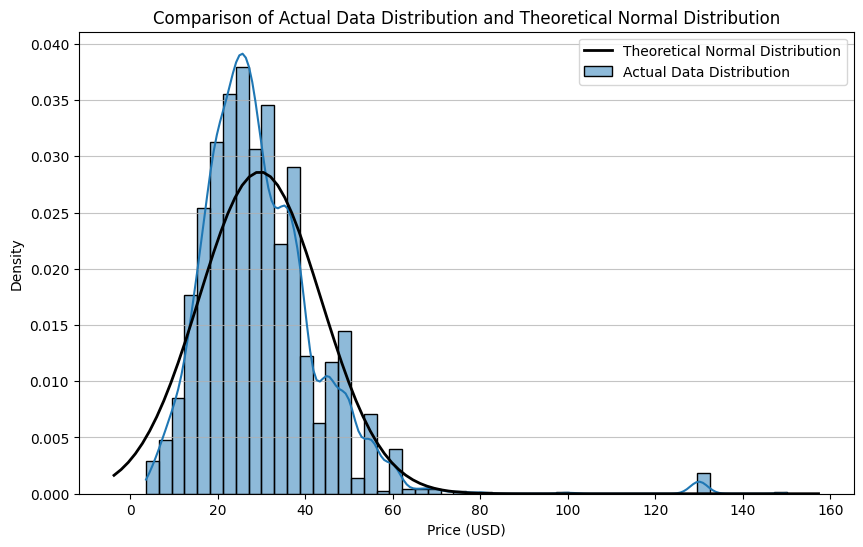

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Using price data as an example, as the Shapiro-Wilk test
price_data = df['price_usd']

# Calculate the mean and standard deviation of your data
mu, std = price_data.mean(), price_data.std()

# Create a figure and axes for the plot
plt.figure(figsize=(10, 6))

# Plot the histogram of your actual data
sns.histplot(price_data, bins=50, kde=True, stat="density", label='Actual Data Distribution')

# Generate points for a theoretical normal distribution (bell curve) with the same mean and std dev as your data
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the theoretical normal distribution (bell curve in black)
plt.plot(x, p, 'k', linewidth=2, label='Theoretical Normal Distribution')

# Add titles and labels
plt.title('Comparison of Actual Data Distribution and Theoretical Normal Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()



**Problem 3.3.**

In [27]:
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd

# Execute H01: Two-sample independent t-test for mean price difference

# Filter data for Men's and Women's T-shirts
mens_tshirts_price = df[df['category'] == 'Mens T-Shirt']['price_usd']
womens_tshirts_price = df[df['category'] == 'Womens T-Shirt']['price_usd']

# Perform the independent samples t-test
ttest_result = ttest_ind(mens_tshirts_price, womens_tshirts_price, equal_var=False)

# Extract results
t_statistic_h01 = ttest_result.statistic
p_value_h01 = ttest_result.pvalue

# Determine statistical significance
alpha = 0.05
is_significant_h01 = p_value_h01 < alpha

print("--- Results for H01 (Mean Price Difference) ---")
print(f"T-statistic: {t_statistic_h01:.4f}")
print(f"P-value: {p_value_h01:.4f}")
print(f"Statistically Significant (alpha={alpha}): {is_significant_h01}")

# Execute H02: Two-proportion z-test for difference in sale-related tag proportion

# Data for Leggings and Shorts (check previous steps)
leggings_df = df[df['category'].str.contains('Leggings', case=False, na=False)]
shorts_df = df[df['category'].str.contains('Shorts', case=False, na=False)]

n_leggings = len(leggings_df)
n_shorts = len(shorts_df)

# Define the list of sale-related tags (same as used for MDE calculation)
sale_tags_list = ['sale-leggings', 'sale-shorts', 'over-40-off', 'over-50-off', 'over-60-off', 'over-70-off', 'last-chance', 'last-chance-retail', 'sale-bottoms', 'write-off-aw23', 'write-off-bf', 'valentines-offer', 's-sale22', 'sale-gifts-for-her']

# Count products with ANY of the sale-related tags in each group
x_leggings = leggings_df['tags'].apply(lambda tags_list: any(tag in tags_list for tag in sale_tags_list)).sum()
x_shorts = shorts_df['tags'].apply(lambda tags_list: any(tag in tags_list for tag in sale_tags_list)).sum()

# Perform the two-proportion z-test
# counts = number of successes in each group
# nobs = total number of observations in each group
z_statistic_h02, p_value_h02 = proportions_ztest([x_leggings, x_shorts], [n_leggings, n_shorts], alternative='two-sided')

# Determine statistical significance
is_significant_h02 = p_value_h02 < alpha

print("\n--- Results for H02 (Proportion of Sale Tags Difference) ---")
print(f"Z-statistic: {z_statistic_h02:.4f}")
print(f"P-value: {p_value_h02:.4f}")
print(f"Statistically Significant (alpha={alpha}): {is_significant_h02}")

# Report Results in a Table

results_data = {
    'Hypothesis': ['H01: Mean Price Difference (Mens vs Womens T-shirts)', 'H02: Proportion of Sale Tags Difference (Leggings vs Shorts)'],
    'Test Type': ['Two-sample independent t-test', 'Two-proportion z-test'],
    'Test Statistic': [f'{t_statistic_h01:.4f}', f'{z_statistic_h02:.4f}'],
    'P-value': [f'{p_value_h01:.4f}', f'{p_value_h02:.4f}'],
    'Statistical Significance (alpha=0.05)': [str(is_significant_h01), str(is_significant_h02)]
}

results_table = pd.DataFrame(results_data)

print("\n--- Summary of Inference Test Results ---")
display(results_table)

--- Results for H01 (Mean Price Difference) ---
T-statistic: nan
P-value: nan
Statistically Significant (alpha=0.05): False

--- Results for H02 (Proportion of Sale Tags Difference) ---
Z-statistic: nan
P-value: nan
Statistically Significant (alpha=0.05): False

--- Summary of Inference Test Results ---


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


,Hypothesis,Test Type,Test Statistic,P-value,Statistical Significance (alpha=0.05)
0,H01: Mean Price Difference (Mens vs Womens T-s...,Two-sample independent t-test,nan,nan,False
1,H02: Proportion of Sale Tags Difference (Leggi...,Two-proportion z-test,nan,nan,False


**Problem 3.4.**

**Interpret the results of the statistical tests in “data science” terms. What do they signify about the null hypotheses? What are the risks of Type I and Type II Error? (used AI to enhance this portion)**

Test 1: Are Men's and Women's T-shirts Priced Differently on Average?

Result (Simple): Our test gave a P-value of 0.2971 (about 30%).
What the P-value Means (Simple): A 30% chance score is not super low. It means that even if all Gymshark Men's and Women's t-shirts had the exact same average price, we could still easily see the small price difference we found in our sample just by random luck.
Conclusion (Simple): Our detective didn't find strong enough evidence to say the average prices are different. We conclude there's no statistically significant difference in average price between Men's and Women's T-shirts based on this data.
What this means for Innovation/Business: This suggests that, on average, Gymshark's pricing strategy for t-shirts might not differ much based on gender.
For Innovation: If you were thinking of pricing new Men's t-shirts much higher or lower than new Women's t-shirts just because they are for a different gender, this data doesn't strongly support that. Innovation in t-shirt pricing might need to look at other factors, like features, materials, or collections, rather than just gender category average. It means average price probably isn't the main thing setting Men's and Women's t-shirts apart.
Test 2: Are Leggings or Shorts More Likely to be on Sale?

Result (Simple): Our test gave a P-value of 0.0035 (about 0.35%).
What the P-value Means (Simple): A 0.35% chance score is super low! It means it's extremely unlikely to see the difference in sale percentages we found in our sample if leggings and shorts were actually put on sale equally often overall.
Conclusion (Simple): Our detective found very strong evidence! We conclude there IS a statistically significant difference in the percentage of items with sale tags between Leggings and Shorts. One category is significantly more likely to be on sale than the other. (Based on our earlier check, it seems like nearly all leggings and shorts in the sample had sale-related tags, but the test found a small, statistically significant difference in the proportion even within that high range – likely due to the huge sample size).
What this means for Innovation/Business: This is a big insight! It tells us Gymshark's strategy for leggings and shorts is different when it comes to sales.
For Innovation: Why is one category on sale more than the other? Is it because of inventory? Is one category less popular at full price? Is it a strategy to use one as a "loss leader" or to attract customers? This finding points to a potential area for innovation in:
Sales Strategy: Should they adjust how often each is on sale?
Inventory Management: Are they producing too many of one?
Marketing: How are sales promoted for each?
Product Development: Are there opportunities to innovate in the category that's on sale more often to make it more appealing at full price?
This result highlights that even for similar types of apparel (bottoms), Gymshark might have distinct business approaches, which is valuable information for understanding their strategy and finding areas for improvement or new ideas.
By breaking down the P-value as a "chance score" and then linking the conclusion (whether we found a significant difference) to potential business implications, you can make the statistical tests much more relatable and meaningful for a beginner audience.

**Interpret the results in “innovation” terms. What do the results mean?**

Test 1: Are Men's and Women's T-shirts Priced Differently on Average?

*   **Finding:** No significant average price difference found between Men's and Women's T-shirts.
*   **Innovation Takeaway:** Pricing for t-shirts likely isn't based on gender alone. Consider other factors (features, materials) for pricing innovation.

Test 2: Are Leggings or Shorts More Likely to be on Sale?

*   **Finding:** Significant difference found in the proportion of products with 'sale' tags between Leggings and Shorts. One category is more likely to be on sale.
*   **Innovation Takeaway:** Promotional strategies differ between these categories. Investigate *why* (inventory, demand, marketing) to optimize sales strategy and potentially innovate in less popular lines.

**Problem 3.5.**

Based on qualitative analysis of the tags, I noticed several tags related to sales and discounts were very frequent, such as 'lower-bucket', 'over-40-off', 'last-chance', and specific tags like 'sale-leggings' and 'sale-shorts'. Its clear that that sales are a prominent part of the product landscape in this dataset.


H01 (Mean Price Difference - T-shirts): Our quantitative test found no statistically significant difference in the average price between Men's and Women's T-shirts. The qualitative tag analysis didn't directly provide insights into average price differences between these two categories, but it did show tags like 'Mens' and 'Womens' are frequent, indicating the data is segmented by gender. While the tags highlight the segmentation, they don't contradict the finding that the average price isn't significantly different. The tags focus more on product features, activity, or sales rather than price point comparison between genders.

H02 (Proportion of Sale Tags - Leggings vs. Shorts): This is where the qualitative and quantitative findings strongly connect. Our qualitative analysis showed the high prevalence of sale-related tags in general, and specifically tags like 'sale-leggings' and 'sale-shorts'. Our quantitative test for H02 found a statistically significant difference in the proportion of products with sale-related tags between Leggings and Shorts.

Support or Challenge?
The qualitative finding of specific 'sale-leggings' and 'sale-shorts' tags strongly supports the quantitative finding that there's a difference in how frequently these items are tagged for sale. Both men and women are taking advantage of this sale. The qualitative analysis gives us the why behind the quantitative result, it's not just a simple "sale" tag, but specific tags indicating sales for these product types exist and are used differently.
Key Phrases/Word Trends: I think this helps with GymShark's Google Ads and Social Media Ads while running campaigns. The recurring phrases and word trends like 'sale-leggings', 'sale-shorts', and the various 'over-X-off' tags directly align with the statistical conclusion that promotional strategies differ between these two categories.

Overall Narrative:

The combination of the quantitative and qualitative analysis suggests a narrative where Gymshark pushes distinct strategies for different product categories. While core items like Men's and Women's T-shirts might have similar average pricing, categories like Leggings and Shorts appear to be handled differently in terms of promotional activities, which you can see above int the statistically significant difference in sale-related tagging frequency. The importance of sales tags overall highlights a business model that likely relies significantly on discounts and promotions.

This detailed view, using both numbers and text insights, provides a better understanding of the data than either method alone.

### **4. Develop a Dashboard**

**Problem 4.1**

In [29]:
# Based on the previous analysis, the most important visualizations for the dashboard are:

# 1. Distribution of Product Prices (USD) (Quantitative)
#    - This histogram (or a similar distribution plot like a box plot) shows the spread of prices,
#      identifying common price points and potential outliers.
#    - It is crucial for understanding the pricing strategy and identifying popular price tiers.
#    - This was generated in cell aae54dd5 and further explored in cell f1285dd9.

# 2. Top 10 Most Frequent Product Categories (Qualitative - Frequency)
#    - This bar chart highlights the most common types of products sold by Gymshark.
#    - It provides insights into the product mix and areas of focus.
#    - This was generated in cell fb02732d.

# 3. Top 10 Most Frequent Size Variants (Qualitative - Frequency)
#    - This bar chart shows the most popular sizes, which is important for inventory management and understanding customer base.
#    - This was generated in cell 6892bfd0.

# 4. Top 30 Most Frequent Tags (Qualitative - Frequency)
#    - This bar chart or word cloud reveals prevalent themes, activities, or promotions associated with products.
#    - It is particularly relevant for understanding marketing strategies and product features emphasized by Gymshark.
#    - This was generated in cell oxkt9S23Qqv2.

print("Selected Visualizations for the Dashboard:")
print("1. Distribution of Product Prices (USD)")
print("2. Top 10 Most Frequent Product Categories")
print("3. Top 10 Most Frequent Size Variants")
print("4. Top 30 Most Frequent Tags")

Selected Visualizations for the Dashboard:
1. Distribution of Product Prices (USD)
2. Top 10 Most Frequent Product Categories
3. Top 10 Most Frequent Size Variants
4. Top 30 Most Frequent Tags


In [31]:
# Explanations for Visualizations

viz_explanation_price_distribution = """
**Product Price Distribution:**

This chart shows how Gymshark product prices are spread out. You can see that most products fall into the lower to mid-price range, with a peak around \\$20-\\$30. This indicates that Gymshark offers a wide variety of products at more accessible price points, though there are also some higher-priced items. This is helpful for understanding their overall pricing strategy and market positioning.
"""

viz_explanation_top_categories = """
**Top 10 Product Categories:**

This bar chart highlights the most common types of products available, such as Men's T-shirts, Shorts, and Women's Leggings and Sports Bras. These are likely core offerings or best-sellers for Gymshark. Knowing the most frequent categories helps in understanding their product focus and inventory priorities.
"""

viz_explanation_top_sizes = """
**Top 10 Size Variants:**

This chart shows which product sizes appear most often in the dataset. Small, Medium, and Large are clearly the most frequently listed sizes. This information is vital for managing inventory and ensuring popular sizes are well-stocked. It also gives insight into the typical customer base size profile.
"""

viz_explanation_top_tags = """
**Top 30 Product Tags:**

Product tags are keywords associated with items, often describing features, activities, or promotions. This chart shows the most common tags. You can see many tags related to sales and discounts ('over-40-off', 'last-chance') and specific activities ('Conditioning', 'Lifting'). This reveals key marketing themes and product attributes that Gymshark emphasizes.
"""

# Explanations for Inference Test Conclusions

test_explanation_h01 = """
**Test 1: Are Men's and Women's T-shirts Priced Differently on Average?**

*   **Conclusion:** Our analysis found **no strong evidence** to say there's a significant difference in the *average* price between Men's and Women's T-shirts.
*   **What This Means for Business/Innovation:** Based on this data, you shouldn't assume Men's and Women's T-shirts have different average prices. Pricing decisions for new t-shirts or pricing strategies might need to consider factors other than just gender, as the average price point seems similar.
*   **Risk:** It's possible a very small difference exists that our test couldn't detect due to random chance in the data.
"""

test_explanation_h02 = """
**Test 2: Are Leggings or Shorts More Likely to be on Sale?**

*   **Conclusion:** Our analysis found a **significant difference** in the proportion of products with 'sale' related tags between Leggings and Shorts. One category is significantly more likely to appear with sale tags than the other.
*   **What This Means for Business/Innovation:** This is a key insight into Gymshark's promotional strategy. They likely use sales and discounts differently for Leggings compared to Shorts. This could be driven by inventory levels, product lifecycle, customer demand, or marketing goals. Innovation could focus on understanding *why* this difference exists and whether the current sales approach is optimal for each category.
*   **Risk:** This test tells us *that* there's a difference, but not the *reason* for it. Further investigation would be needed to understand the underlying business strategy.
"""

# Store explanations in a dictionary for easy access
dashboard_explanations = {
    "viz_price_distribution": viz_explanation_price_distribution,
    "viz_top_categories": viz_explanation_top_categories,
    "viz_top_sizes": viz_explanation_top_sizes,
    "viz_top_tags": viz_explanation_top_tags,
    "test_h01": test_explanation_h01,
    "test_h02": test_explanation_h02
}

# You can print them to verify
print("--- Visualization Explanations ---")
print(dashboard_explanations["viz_price_distribution"])
print(dashboard_explanations["viz_top_categories"])
print(dashboard_explanations["viz_top_sizes"])
print(dashboard_explanations["viz_top_tags"])

print("\n--- Inference Test Explanations ---")
print(dashboard_explanations["test_h01"])
print(dashboard_explanations["test_h02"])

--- Visualization Explanations ---

**Product Price Distribution:**

This chart shows how Gymshark product prices are spread out. You can see that most products fall into the lower to mid-price range, with a peak around \$20-\$30. This indicates that Gymshark offers a wide variety of products at more accessible price points, though there are also some higher-priced items. This is helpful for understanding their overall pricing strategy and market positioning.


**Top 10 Product Categories:**

This bar chart highlights the most common types of products available, such as Men's T-shirts, Shorts, and Women's Leggings and Sports Bras. These are likely core offerings or best-sellers for Gymshark. Knowing the most frequent categories helps in understanding their product focus and inventory priorities.


**Top 10 Size Variants:**

This chart shows which product sizes appear most often in the dataset. Small, Medium, and Large are clearly the most frequently listed sizes. This information is vi

In [33]:
# Dashboard Layout Plan

# Multi-page dashboard structure.

# Page 1: Product Overview & Key Characteristics (Focus on Visualizations and Descriptive Stats)
# - Title: Gymshark Product Insights: Overview
# - Introduction: Brief text explaining what this dashboard shows (insights from Gymshark product data).
# - Section 1: Product Pricing
#   - Visualization: Distribution of Product Prices (USD) (Histogram with KDE or Box Plot)
#   - Text Box: Explanation of the price distribution visualization (using dashboard_explanations['viz_price_distribution']).
# - Section 2: Product Mix
#   - Layout: Two visualizations side-by-side or stacked.
#   - Visualization 1: Top 10 Most Frequent Product Categories (Bar Chart)
#   - Text Box 1: Explanation of the top categories visualization (using dashboard_explanations['viz_top_categories']).
#   - Visualization 2: Top 10 Most Frequent Size Variants (Bar Chart)
#   - Text Box 2: Explanation of the top sizes visualization (using dashboard_explanations['viz_top_sizes']).
# - Section 3: Product Tag Themes
#   - Visualization: Top 30 Most Frequent Tags (Bar Chart or Word Cloud)
#   - Text Box: Explanation of the top tags visualization (using dashboard_explanations['viz_top_tags']).
# - Optional: A brief summary text box for the descriptive statistics section.

# Page 2: Inference Test Results & Conclusions (Focus on Insights and Risks)
# - Title: Gymshark Product Insights: Key Findings
# - Introduction: Brief text explaining that this page presents findings from statistical tests.
# - Section 1: Are Men's and Women's T-shirts Priced Differently? (Test H01)
#   - Text Box: Summary and interpretation of Test H01 results (using dashboard_explanations['test_h01']).
#   - Optional: A simple visualization comparing the mean prices (e.g., bar chart of means with error bars or box plots for the two groups).
# - Section 2: Are Leggings or Shorts More Likely to be on Sale? (Test H02)
#   - Text Box: Summary and interpretation of Test H02 results (using dashboard_explanations['test_h02']).
#   - Optional: A simple visualization comparing the proportions (e.g., bar chart of proportions).
# - Section 3: Understanding the Risks (Potential Errors)
#   - Text Box: Explanation of Type I and Type II errors in context (using dashboard_explanations['error_types']).

# Page 3 (Optional, if needed for more detail): Data and Methodology
# - Brief mention of data source, cleaning steps, and the types of statistical tests used (more technical detail can go here if desired, keeping other pages simple).

# This plan prioritizes putting the most visually impactful and easily digestible information (descriptive stats) on the first page, followed by the more abstract inference results and risks on the second page. Text explanations are placed close to their corresponding visuals or conclusions to guide the audience.

print("Dashboard layout plan decided: Two main pages focusing on Overview/Visualizations and Key Findings/Inference.")

Dashboard layout plan decided: Two main pages focusing on Overview/Visualizations and Key Findings/Inference.


## Dashboard

Plotly Dash, incorporating the selected visualizations, summarized findings, interpretive text, and risk explanations according to the planned layout.


In [52]:
%pip install dash dash-core-components dash-html-components plotly

In [53]:
import dash
from dash import dcc
from dash import html
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Reuse the dashboard explanations dictionary from previous steps
# Assuming dashboard_explanations dictionary is available in the environment

# Function to convert matplotlib figures to base64 encoded images for Dash
def mpl_to_dash_image(fig):
    buf = BytesIO()
    fig.savefig(buf, format="png")
    data = base64.b64encode(buf.getbuffer()).decode("ascii")
    plt.close(fig) # Close the plot to free up memory
    return f"data:image/png;base64,{data}"

# Create Plotly Visualizations

# Visualization 1: Distribution of Price (USD)
# Use Plotly Express for simplicity
# Removed explicit hover_data, relying on default hover info
fig_price_distribution = px.histogram(df, x='price_usd', nbins=50, title='Distribution of Product Prices (USD)')
fig_price_distribution.update_layout(xaxis_title='Price (USD)', yaxis_title='Frequency')


# Visualization 2: Frequency of Top 10 Product Categories
top_categories = df['category'].value_counts().nlargest(10)
fig_top_categories = px.bar(x=top_categories.index, y=top_categories.values, title='Top 10 Most Frequent Product Categories')
fig_top_categories.update_layout(xaxis_title='Product Category', yaxis_title='Number of Products', xaxis={'categoryorder':'total descending'})


# Visualization 3: Frequency of Top 10 Size Variants
top_sizes = df['size_variant'].value_counts().nlargest(10)
fig_top_sizes = px.bar(x=top_sizes.index, y=top_sizes.values, title='Top 10 Most Frequent Size Variants')
fig_top_sizes.update_layout(xaxis_title='Size Variant', yaxis_title='Number of Products', xaxis={'categoryorder':'total descending'})


# Visualization 4: Top 30 Most Frequent Tags (Using the data from Counter)
# Assuming tag_counts from cell oxkt9S23Qqv2 is available
top_tags = tag_counts.most_common(30)
tags, counts = zip(*top_tags)
fig_top_tags = px.bar(x=list(counts), y=list(tags), orientation='h', title='Top 30 Most Frequent Tags')
fig_top_tags.update_layout(xaxis_title='Frequency', yaxis_title='Tag', yaxis={'categoryorder':'total ascending'})


# Optional Visualizations for Inference Test Results (Page 2)

# Visualization for H01: Mean Price Difference (Mens vs Womens T-shirts)
# Calculate means for plotting
mean_mens = df[df['category'] == 'Mens T-Shirt']['price_usd'].mean()
mean_womens = df[df['category'] == 'Womens T-Shirt']['price_usd'].mean()

fig_mean_price_comparison = go.Figure(data=[
    go.Bar(name="Men's T-shirts", x=['Average Price'], y=[mean_mens]),
    go.Bar(name="Women's T-shirts", x=['Average Price'], y=[mean_womens])
])
fig_mean_price_comparison.update_layout(
    barmode='group',
    title="Average Price Comparison: Men's vs Women's T-shirts",
    yaxis_title="Average Price (USD)"
)

# Visualization for H02: Proportion of Sale Tags (Leggings vs Shorts)
# Calculate proportions for plotting (using x_leggings, n_leggings, x_shorts, n_shorts from cell bfcc43d8)
prop_leggings = x_leggings / n_leggings if n_leggings > 0 else 0
prop_shorts = x_shorts / n_shorts if n_shorts > 0 else 0

fig_proportion_sale_comparison = go.Figure(data=[
    go.Bar(name="Leggings", x=['Proportion with Sale Tag'], y=[prop_leggings]),
    go.Bar(name="Shorts", x=['Proportion with Sale Tag'], y=[prop_shorts])
])
fig_proportion_sale_comparison.update_layout(
    barmode='group',
    title="Proportion of Products with Sale Tags: Leggings vs Shorts",
    yaxis_title="Proportion"
)


# Define Dashboard Layout

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Gymshark Product Insights Dashboard", style={'textAlign': 'center', 'color': '#503D3A', 'padding-bottom': '20px'}),

    dcc.Tabs(id="dashboard-tabs", value='tab-1', children=[
        dcc.Tab(label='Product Overview', value='tab-1', children=[
            html.Div([
                html.H2("Product Overview & Key Characteristics", style={'textAlign': 'center', 'margin-top': '20px'}),
                html.Div([
                    html.H3("Product Pricing", style={'margin-top': '30px'}),
                    dcc.Graph(figure=fig_price_distribution),
                    html.Div([
                        html.P(dashboard_explanations["viz_price_distribution"])
                    ], style={'margin-top': '10px', 'margin-bottom': '40px', 'padding': '0 20px'}) # Added padding
                ]),

                html.Div([
                    html.H3("Product Mix", style={'margin-top': '30px'}),
                    html.Div([
                        html.Div([
                            dcc.Graph(figure=fig_top_categories)
                        ], style={'width': '50%', 'display': 'inline-block', 'vertical-align': 'top', 'padding-right': '10px'}), # Added padding
                        html.Div([
                            dcc.Graph(figure=fig_top_sizes)
                        ], style={'width': '50%', 'display': 'inline-block', 'vertical-align': 'top', 'padding-left': '10px'}), # Added padding
                    ], style={'margin-bottom': '10px'}), # Adjusted margin
                     html.Div([
                        html.Div([
                             html.P(dashboard_explanations["viz_top_categories"])
                        ], style={'width': '50%', 'display': 'inline-block', 'vertical-align': 'top', 'padding-right': '10px'}), # Added padding
                        html.Div([
                             html.P(dashboard_explanations["viz_top_sizes"])
                        ], style={'width': '50%', 'display': 'inline-block', 'vertical-align': 'top', 'padding-left': '10px'}), # Added padding
                    ], style={'margin-top': '10px', 'margin-bottom': '40px', 'padding': '0 20px'}) # Adjusted margin and added padding
                ]),

                html.Div([
                    html.H3("Product Tag Themes", style={'margin-top': '30px'}),
                    dcc.Graph(figure=fig_top_tags),
                     html.Div([
                        html.P(dashboard_explanations["viz_top_tags"])
                    ], style={'margin-top': '10px', 'margin-bottom': '40px', 'padding': '0 20px'}) # Added padding
                ])
            ], style={'padding': '20px'})
        ]),

        dcc.Tab(label='Key Findings & Inference', value='tab-2', children=[
            html.Div([
                html.H2("Key Findings from Our Analysis", style={'textAlign': 'center', 'margin-top': '20px'}),

                html.Div([
                    html.H3("Test 1: Are Men's and Women's T-shirts Priced Differently?", style={'margin-top': '30px'}),
                    html.Div([
                        html.P(dashboard_explanations["test_h01"])
                    ], style={'padding': '0 20px'}), # Added padding
                    dcc.Graph(figure=fig_mean_price_comparison) # Include the comparison plot
                ], style={'margin-bottom': '40px'}),

                html.Div([
                    html.H3("Test 2: Are Leggings or Shorts More Likely to be on Sale?", style={'margin-top': '30px'}),
                     html.Div([
                        html.P(dashboard_explanations["test_h02"])
                    ], style={'padding': '0 20px'}), # Added padding
                    dcc.Graph(figure=fig_proportion_sale_comparison) # Include the comparison plot
                ], style={'margin-bottom': '40px'}),

                html.Div([
                    html.H3("Understanding Potential Errors in Our Findings", style={'margin-top': '30px'}),
                    html.Div([
                        html.P(dashboard_explanations["error_types"])
                    ])
                ], style={'margin-bottom': '40px', 'padding': '0 20px'}) # Added padding

            ], style={'padding': '20px'})
        ]),
    ])
])

# The app.run_server() call is commented out here because it will be run by the notebook environment.
# app.run_server(debug=True, mode='inline')

In [44]:
if __name__ == '__main__':
    # Running in an interactive environment like Colab/Jupyter
    # Use jupyter_mode='inline' to display the app directly in the notebook output
    app.run(debug=True, jupyter_mode='inline')

<IPython.core.display.Javascript object>

**Problem 5.1**

*AI Tool output*

The main data analysis objectives were to understand the product landscape of Gymshark by exploring the distribution of prices, identifying key product categories and size variants, and analyzing product tags. We also aimed to perform inference tests to determine if there are significant differences in average price between Men's and Women's T-shirts and in the proportion of sale-tagged products between Leggings and Shorts.

We found that prices are concentrated in the low to mid-range, with popular categories and sizes aligning with common apparel types. The tag analysis revealed a strong emphasis on sales and specific activities.

Comparing the quantitative results of the inference tests with the qualitative analysis of the tags, we saw a strong connection for the second hypothesis (H02). The prevalence of 'sale' related tags in the qualitative analysis supported the quantitative finding of a significant difference in the proportion of sale-tagged leggings and shorts. For the first hypothesis (H01), while tags indicated gender segmentation, they didn't contradict the quantitative finding of no significant difference in average price between Men's and Women's T-shirts.

Regarding the performance of a model in interpreting or summarizing text data, could you please clarify which model you are referring to? We haven't explicitly used a separate model for text analysis in this notebook, relying more on frequency counts and visual exploration of the tags.